In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [21]:
data_path = 'data/expanded.csv'

header = ['labels', 'cap-shape', 'cap-color', 'cap-surface', 'bruises', 'odor', 'gill-attachment', 
          'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
          'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
          'stalk-color-below-ring',
          'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
          'population', 'habitat'
         ]
print(len(header))
data = pd.read_csv(data_path, names=header)
data.head()

23


,labels,cap-shape,cap-color,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [33]:
# shuffle the dataset
data = data.iloc[np.random.permutation(len(data))]
data

,labels,cap-shape,cap-color,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3801,EDIBLE,FLAT,SCALY,BROWN,BRUISES,NONE,FREE,CLOSE,BROAD,PINK,...,SMOOTH,WHITE,PINK,PARTIAL,WHITE,ONE,PENDANT,BLACK,SEVERAL,WOODS
3131,EDIBLE,FLAT,FIBROUS,GRAY,BRUISES,NONE,FREE,CLOSE,BROAD,PURPLE,...,SMOOTH,PINK,PINK,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
7815,POISONOUS,KNOBBED,SCALY,BROWN,NO,SPICY,FREE,CLOSE,NARROW,BUFF,...,SMOOTH,PINK,WHITE,PARTIAL,WHITE,ONE,EVANESCENT,WHITE,SEVERAL,PATHS
2741,EDIBLE,CONVEX,SCALY,GRAY,BRUISES,NONE,FREE,CLOSE,BROAD,BROWN,...,SMOOTH,GRAY,WHITE,PARTIAL,WHITE,ONE,PENDANT,BLACK,SEVERAL,WOODS
3941,POISONOUS,CONVEX,SMOOTH,PINK,NO,CREOSOTE,FREE,CLOSE,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BLACK,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,EDIBLE,CONVEX,SMOOTH,GRAY,NO,NONE,FREE,CROWDED,BROAD,GRAY,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,TWO,PENDANT,WHITE,NUMEROUS,GRASSES
8099,EDIBLE,KNOBBED,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,PINK,...,SILKY,WHITE,WHITE,PARTIAL,WHITE,TWO,PENDANT,WHITE,NUMEROUS,GRASSES
3615,EDIBLE,FLAT,SCALY,GRAY,BRUISES,NONE,FREE,CLOSE,BROAD,BROWN,...,SMOOTH,GRAY,GRAY,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1595,EDIBLE,CONVEX,FIBROUS,GRAY,NO,NONE,FREE,CROWDED,BROAD,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,EVANESCENT,BROWN,ABUNDANT,GRASSES


In [24]:
# split dataset into train_test dataset
train, test = train_test_split(data, shuffle=True)

In [25]:
# split the train data into train_valid dataset
train, valid = train_test_split(train, shuffle=True)

In [26]:
X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]
X_valid, y_valid = valid.iloc[:, 1:], valid.iloc[:, 0]
len(X_train), len(X_valid), len(y_train), len(y_valid)

(4734, 1578, 4734, 1578)

In [27]:
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_valid, y_valid = X_valid.to_numpy(), y_valid.to_numpy()

In [31]:
for name, col in zip(list(train)[1:], range(X_train.shape[1])):
    label, counts = np.unique(X_train[:, col], return_counts=True)
    print(name, label, counts, end='\n\n')

cap-shape ['BELL' 'CONICAL' 'CONVEX' 'FLAT' 'KNOBBED' 'SUNKEN'] [ 252    1 2124 1873  469   15]

cap-color ['FIBROUS' 'GROOVES' 'SCALY' 'SMOOTH'] [1408    1 1852 1473]

cap-surface ['BROWN' 'BUFF' 'CINNAMON' 'GRAY' 'GREEN' 'PINK' 'PURPLE' 'RED' 'WHITE'
 'YELLOW'] [1258   95   31 1209    7   82    9  851  598  594]

bruises ['BRUISES' 'NO'] [1913 2821]

odor ['ALMOND' 'ANISE' 'CREOSOTE' 'FISHY' 'FOUL' 'MUSTY' 'NONE' 'PUNGENT'
 'SPICY'] [ 219  220  103  320 1221   27 2157  143  324]

gill-attachment ['ATTACHED' 'FREE'] [ 110 4624]

gill-spacing ['CLOSE' 'CROWDED'] [3840  894]

gill-size ['BROAD' 'NARROW'] [3318 1416]

gill-color ['BLACK' 'BROWN' 'BUFF' 'CHOCOLATE' 'GRAY' 'GREEN' 'ORANGE' 'PINK'
 'PURPLE' 'RED' 'WHITE' 'YELLOW'] [267 652 960 453 406  16  31 860 286  53 699  51]

stalk-shape ['ENLARGING' 'TAPERING'] [1980 2754]

stalk-root ['?' 'BULBOUS' 'CLUB' 'EQUAL' 'ROOTED'] [1363 2169  322  778  102]

stalk-surface-above-ring ['FIBROUS' 'SCALY' 'SILKY' 'SMOOTH'] [ 402   15 1345 2972]


After studying the data, I discovered that several features share almost similar characteristics
e.g., column 11 and 12, column 13 and 14
So when building a model, we can remove one of them, or completely remove the duplicates (because we are not sure which one is correct)

<AxesSubplot:>

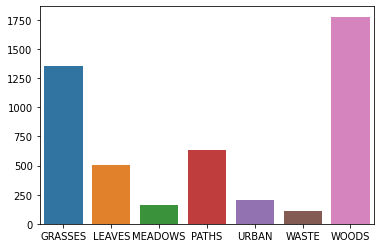

In [267]:
x, y = np.unique(X_train[:, 21], return_counts=True)
sns.barplot(x=x, y=y)

c:\users\dell\python3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

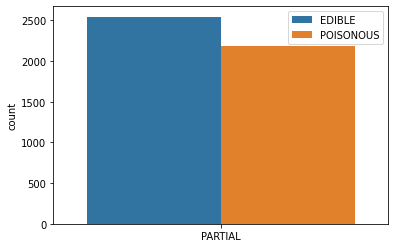

In [273]:
sns.countplot(X_train[:, 15], hue=y_train)

In [220]:
encoder = OrdinalEncoder()
encoder = encoder.fit(X_train)
X_train_encoded = encoder.transform(X_train)
X_train_encoded

array([[3., 0., 3., ..., 0., 4., 4.],
       [2., 2., 9., ..., 0., 3., 0.],
       [3., 0., 3., ..., 3., 5., 6.],
       ...,
       [2., 2., 0., ..., 1., 5., 6.],
       [2., 0., 0., ..., 0., 4., 6.],
       [3., 3., 8., ..., 0., 3., 4.]])

In [249]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_train_encoded)
X_tsne.shape

(4734, 2)

<AxesSubplot:>

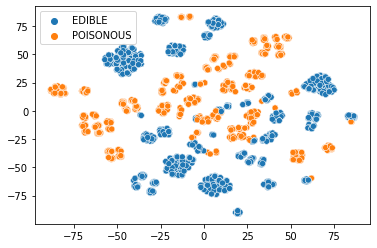

In [250]:
sns.scatterplot(x=X_tsne[:, 0], y =X_tsne[:, 1], hue=y_train)

From the above visualization, it can be safe to say a machine learning model,
can learning to differentiate between poisonous and non-poisonous mushroom
